In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
# linear algebra
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


In [14]:
train_data=pd.read_csv("/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv")
test_data=pd.read_csv("/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv")

In [15]:
train_data.head(5)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [16]:
test_data.head(5)

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0


In [17]:
train_data.isnull().sum()
test_data.isnull().sum()

user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          42478
started_at      143044
n_votes              0
n_comments           0
dtype: int64

In [18]:
train_data.drop(columns=["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"], inplace = True)
test_data.drop(columns = ["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"], inplace = True)

In [19]:
train_data.isna().sum()

rating         0
review_text    0
dtype: int64

In [20]:
test_data.isna().sum()

review_text    0
dtype: int64

In [21]:
train_data["review_text"]=train_data["review_text"].apply(lambda x:str(x).lower())
test_data["review_text"]=train_data["review_text"].apply(lambda x:str(x).lower())

In [22]:
train_data["review_text"]=train_data["review_text"].apply(lambda x:" ".join(x.split()))
test_data["review_text"]=train_data["review_text"].apply(lambda x:" ".join(x.split()))

In [23]:
import re
train_data["review_text"] = train_data["review_text"].apply(
    lambda x: re.sub(r'https?://\S+','',
        x, flags=re.MULTILINE))
test_data["review_text"] = test_data["review_text"].apply(
    lambda x: re.sub(r'www\.\S+','',
        x, flags=re.MULTILINE))

In [24]:
train_data["review_text"]=train_data["review_text"].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+',' ',x))
test_data["review_text"]=test_data["review_text"].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+',' ', x))

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))
len(stop_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [29]:
train_data["review_text"] = train_data["review_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_data["review_text"] = test_data["review_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    # Initialize the wordcloud
    wordcloud = WordCloud(
        colormap            = "Spectral",
        scale               = 3,
        random_state        = 1
    ).generate(str(data))

    # Customize the wordcloud plot
    fig = plt.figure(1, figsize = (16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()

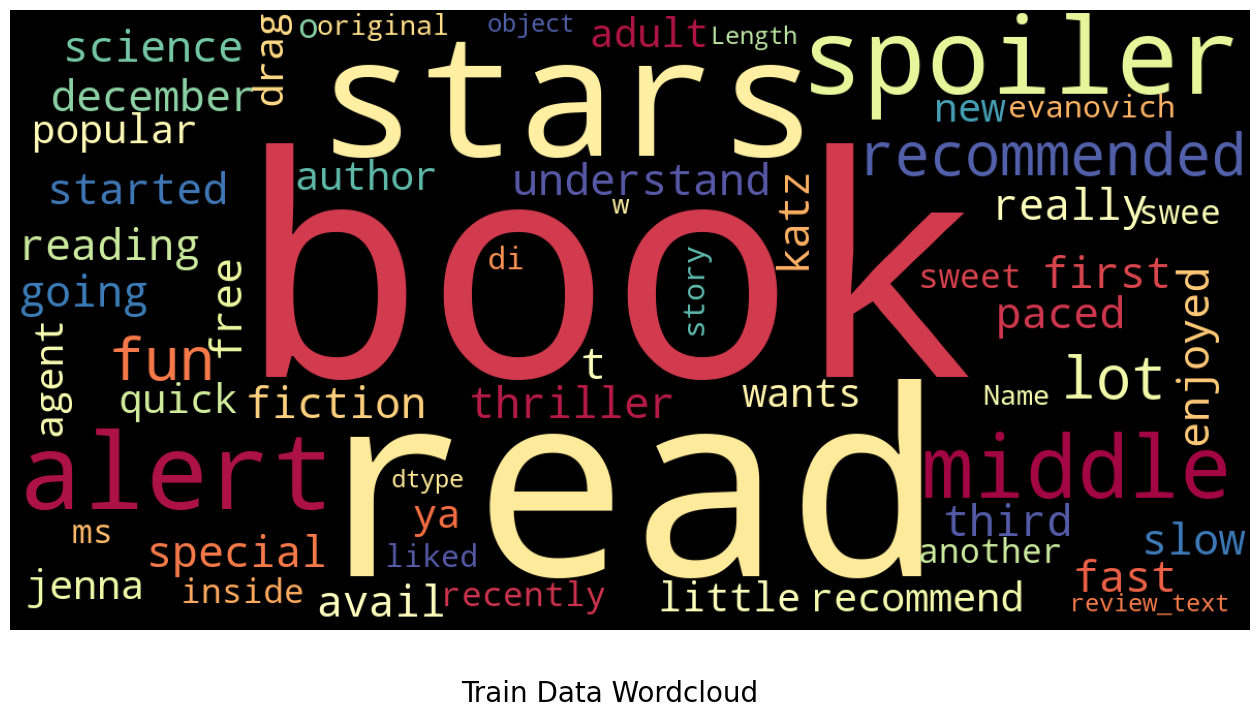

In [41]:
show_wordcloud(train_data["review_text"], title = "Train Data Wordcloud")

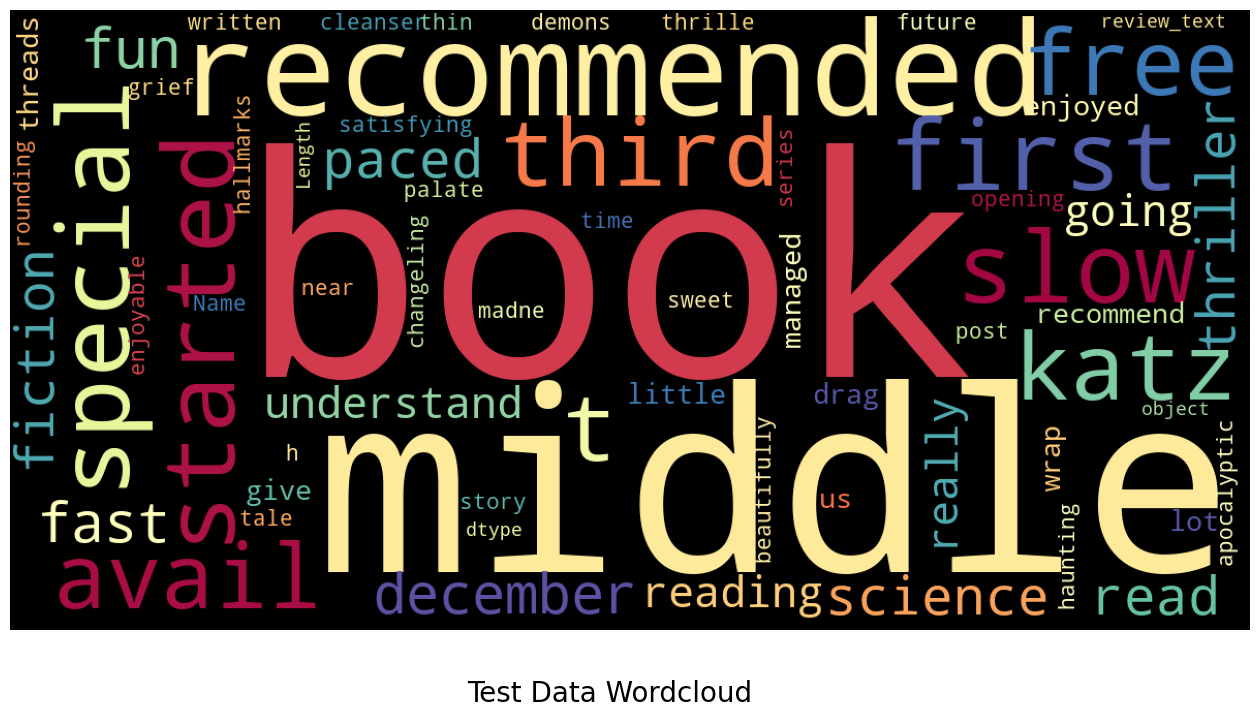

In [43]:
show_wordcloud(test_data["review_text"], title = "Test Data Wordcloud")

In [44]:
import plotly.express as px
import plotly.graph_objects as go

# HTML to display the plotly chart
from IPython.core.display import HTML

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get frequency of words
def get_top_n_words(corpus, n = None, ngram_range = (1, 1)):

    # CountVectorize the text
    vec = CountVectorizer(stop_words = 'english', ngram_range = ngram_range).fit(corpus)

    # Create the bag_of_words 
    bag_of_words = vec.transform(corpus)

    # Get the sum of the count of words
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort the words by the frequencey
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    # Return first n words
    return words_freq[:n]
    

In [47]:
def get_frequency_count_plot(df, title, n = 20, ngram_range = (1, 1)):
    
    # Get top 20 words from data
    common_words = get_top_n_words(df['review_text'], n, ngram_range)

    # Create a dataframe of top n words
    temp_df = pd.DataFrame(common_words, columns = ['review_text' , 'count'])
    temp_df = temp_df.groupby('review_text').sum()['count'].sort_values(ascending = False)
        
    # Create plotly figure bar plot to display data
    fig = go.Figure([
        go.Bar(x = temp_df.keys(), y = temp_df.values)
    ])
    fig.update_layout(
        title = title,
        xaxis_title = "Word",
        yaxis_title = "Count",
        width = 1000,
        height = 600,
    )
    fig.update_xaxes(tickangle = 90)
    
    return fig

In [48]:
get_frequency_count_plot(df = train_data, title = "Top 20 words - unigrams - Train Data", n = 20, ngram_range = (1, 1))

In [49]:
get_frequency_count_plot(df = test_data, title = "Top 20 words - unigrams - Test Data", n = 20, ngram_range = (1, 1))